In [37]:
import numpy as np
import random
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### Challenge 1

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
import mglearn
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import Normalizer
import sys
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
hm=pd.read_csv("/Users/admin/desktop/data incubator 2020/happydb/cleaned_hm.csv")
demo=pd.read_csv("/Users/admin/desktop/data incubator 2020/happydb/demographic.csv")

In [5]:
demo.index=demo.wid

In [6]:
hm.shape,demo.shape

((100535, 9), (10844, 6))

In [7]:
hm.ground_truth_category.value_counts()

affection           4810
achievement         4276
bonding             1750
enjoy_the_moment    1514
leisure             1306
nature               252
exercise             217
Name: ground_truth_category, dtype: int64

In [8]:
hm.predicted_category.value_counts()

affection           34168
achievement         33993
enjoy_the_moment    11144
bonding             10727
leisure              7458
nature               1843
exercise             1202
Name: predicted_category, dtype: int64

In [9]:
hm['age']=hm.wid.replace(demo.age)
hm['country']=hm.wid.replace(demo.country)
hm['gender']=hm.wid.replace(demo.gender)
hm['marital']=hm.wid.replace(demo.marital)
hm['parenthood']=hm.wid.replace(demo.parenthood)

In [10]:
hm.gender.value_counts()

m    57690
f    42069
o      697
Name: gender, dtype: int64

In [11]:
hm.groupby('gender').count()/hm.shape[0]

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,age,country,marital,parenthood
gender,,,,,,,,,,,,,
f,0.418451,0.418451,0.418451,0.418451,0.418451,0.418451,0.418451,0.058199,0.418451,0.418123,0.417347,0.417705,0.418153
m,0.573830,0.573830,0.573830,0.573830,0.573830,0.573830,0.573830,0.081355,0.573830,0.573542,0.573064,0.573323,0.573611
o,0.006933,0.006933,0.006933,0.006933,0.006933,0.006933,0.006933,0.000885,0.006933,0.006903,0.006933,0.006903,0.006903


In [12]:
target=hm.ground_truth_category
target_predicted=hm.predicted_category
target_predicted_num=preprocessing.label_binarize(target_predicted, classes=[0, 1, 2, 3, 4, 5, 6])

In [13]:
target_predicted_num

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
predictors=hm.drop(columns=['ground_truth_category','predicted_category','hmid', 'wid', 'reflection_period','original_hm'])

In [15]:
demopredictor=hm.iloc[:,-5:]
demopredictor_dumm=pd.get_dummies(demopredictor)

In [16]:
X_train,X_test, y_train, y_test=train_test_split(demopredictor_dumm,target_predicted)

In [20]:
X_train_w,X_test_w, y_train_w, y_test_w=train_test_split(predictors.cleaned_hm,target_predicted)

In [21]:
vect = CountVectorizer()
X_train_w = vect.fit_transform(X_train_w)
X_test_w= vect.transform(X_test)
feature_names = vect.get_feature_names()

In [26]:
#train on title logistic regression w/o tuning
from sklearn.svm import LinearSVC
tree_simple =tree.DecisionTreeClassifier(max_depth=2).fit(X_train_w, y_train)
# mglearn.tools.visualize_coefficients(lr.coef_, feature_names, n_top_features=20)
# plt.show()

In [33]:
from sklearn.svm import LinearSVC
# lr =LogisticRegression(class_weight='balanced',multi_class='ovr').fit(X_train_w, y_train_w)
lr_train=lr.score(X_train_w, y_train_w)
lr_test=lr.score(X_train_w, y_train_w)
print("score (training set):",lr_train)
print("score(testing set):",lr_test)
print("C for untuned lr: 1")
# mglearn.tools.visualize_coefficients(lr.coef_, feature_names, n_top_features=20)
# plt.show()

score (training set): 0.9749207570191377
score(testing set): 0.9749207570191377
C for untuned lr: 1


In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(tree.DecisionTreeClassifier(random_state=0),param_grid=param_grid,
                    cv=10,return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 7)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=Non

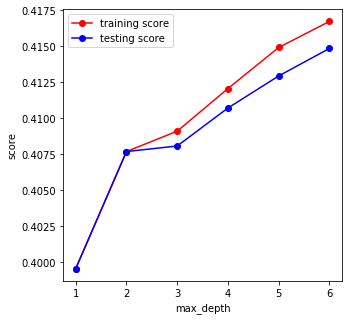

In [45]:
fig, ax = plt.subplots(1, 1,figsize=(5,5))
results_c = pd.DataFrame(grid.cv_results_)
ax.plot(range(1, 7), results_c.mean_train_score, 'ro-',label='training score')
ax.plot(range(1, 7), results_c.mean_test_score, 'bo-',label='testing score')
ax.set_xlabel("max_depth")
ax.set_ylabel("score")
ax.legend()
plt.show()